### Neuronale Netze

#### Logistische Regression mit *Gradient Descent*

Logistische Regression mit Gradient Descent ist ein Algorithmus mit dem Beobachtungsdaten diskreten Klassen 
zugeordnet werden können. Im einfachsten Fall sind es zwei Klassen (binärer classifier).  

**Beispiel:**
Für Hunde werden folgende Daten gemessen:

* Alter
* Geschlecht
* Würmer  
* Ruhender Blutdruck
* Cholesterinspiegel (in mg/dl)
* Nüchtern-Blutzuckerspiegel > 120 mg/dl (1 = hoch; 0 = niedrig)
* Ruhende elektrokardiographische Ergebnisse (0 = normal, 1 = ST-T Abnormalität, 2 = linke ventrikuläre Hypertrophie)
* Maximale Herzrate
* Durch Bewegung verursachte Angina pectoris (1 = Ja; 0 = Nein) 
* ST-Depression, die durch Bewegung in Bezug auf die Ruhephase hervorgerufen wird (ein Marker im EKG).
* Die maximale Steigung des ST-Segments bei Bewegung
* Anzahl der großen Gefäße (0-3), aufgenommen durch Ultraschall
* Blutfluss im Herz (3 = normal; 6 = fixer defekt; 7 = reversibler defekt )



Die Hunde sollen in zwei Klassen eingeteilt werden: krank / nicht krank

Beispiele für Datensätze von kranken Hunden:

```
14.33 1.0 4.0 120.0 229.0 0.0 2.0 129.0 1.0 2.6 2.0 2.0 7.0 
 13.0 1.0 4.0 130.0 254.0 0.0 2.0 147.0 0.0 1.4 2.0 1.0 7.0 
  8.0 1.0 2.0 110.0 229.0 0.0 0.0 168.0 0.0 1.0 3.0 0.0 7.0 
```

Beispiele für Datensätze von gesunden Hunden:

```
10.66 1.0 2.0 120.0 236.0 0.0 0.0 178.0 0.0 0.8 1.0 0.0 3.0  
 11.0 0.0 4.0 120.0 354.0 0.0 0.0 163.0 1.0 0.6 1.0 0.0 3.0  
 6.66 1.0 2.0 120.0 263.0 0.0 0.0 173.0 0.0 0.0 1.0 0.0 7.0 
```

Wir haben 426 Datensätzen, für die wir die Ergebnisse kennen. Wir trennen sie auf in:

* 80% Trainingsdaten: damit justiert der Algorithmus seine internen Parameter  
* 20% Testdaten: damit überprüfen wir, ob der Algorithmus korrekte Vorhersagen macht.

#### Hundedaten mit 2 Features
Die Komponenten der Datensätze heißen *features*. Die Ergebnisse heißen *label*. Zur Vereinfachung schränken wir die Datensätze auf
2 Features ein: Maximale Herzrate (Index 7) und ST-Depression (Index 9).

Wir verfolgen den Algorithmus zunächst an einem einzelnen Datensatz. Die Label bezeichnen wir mit 1 (krank) und 0 (gesund).
Der Algorithmus nimmt einen Datensatz entgegen und berechnet die Wahrscheinlichkeit, dass der Hund krank ist. Wenn die gewichtete
Summe der Eingabe größer als ein Schwellwert ist, wird der Hund als krank eingeschätzt. Der negative Schwellwert heißt **Bias b**.

Mit dem Begriff **gewichtete Summe** bezeichnen wir im Folgenden die gewichtete Summe der Eingaben plus dem Bias. Um die gewichtete Summe in eine Wahrscheinlichkeit zu verwandeln nutzen wir die **sigmoid**-Funktion. Mit der **cross entropy**-Funktion messen wir den Fehler (= die Kosten), den wir mit der aktuellen Wahl der Parameter machen.

<img src="./img/nn_30.png" width="801"/>  



Zu Beginn setzen wir die Parameter $w_1, w_2, b$ zufällig und berechnen den Fehler, den wir damit machen.

#### Die Kostenfunktion

<img src="./img/nn_26.png" width="600"/>  

Beispiel (aus den Datensätzen von oben):


In [99]:
import numpy as np
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def L(a,y):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

w1, w2, b = 0.1, 0.1, -13         # zufällig gewählte Parameter

x1, x2, y = 129, 2.6, 1.0         # erster kranker Hund von oben
z = w1 * x1 + w2 * x2 + b
a = sigmoid(z)
cost = L(a,y)
print('z={:5.2f}, a={:5.2f}, y={:5.2f}, cost={:5.2f}'.format(z,a,y,cost))

x1, x2, y = 178, 0.8, 0.0         # erster gesunder Hund von oben
z = w1 * x1 + w2 * x2 + b
a = sigmoid(z)
cost = L(a,y)
print('z={:5.2f}, a={:5.2f}, y={:5.2f}, cost={:5.2f}'.format(z,a,y,cost))



z= 0.16, a= 0.54, y= 1.00, cost= 0.62
z= 4.88, a= 0.99, y= 0.00, cost= 4.89


Für
```
w1, w2, b = 0.1, 0.1, -13 
```
erhält man das Ergebnis
```
z= 0.16, a= 0.54, y= 1.00, loss= 0.62
z= 4.88, a= 0.99, y= 0.00, loss= 4.89
```

Interpretation:
* Die Wahrscheinlichkeit, dass der Hund des 1. Datensatzes krank ist, wird mit 0.54 berechnet. Laut y-Wert ist er krank. Der Fehler dieser Berechnung wird mit 0.62 bewertet.
* Die Wahrscheinlichkeit, dass der Hund des 2. Datensatzes krank ist, wird mit 0.99 berechnet. Laut y-Wert ist er gesund. Der Fehler dieser Berechnung wird mit 4.89 bewertet.

#### Der Gradient

Wir möchten die Parameter so ändern, dass der Fehler möglichst klein wird. Wir betrachten zunächst einen einfachen **computation graph**. 
Wie wirken sich Änderungen der Eingaben $a,b,c$ auf das Ergebnis $w$ aus?

<img src="./img/nn_31.png" width="800"/>  

Der Vektor $(3,6,9)$ heißt **Gradient** der Funktion $w(a,b,c)$ an der Stelle $(5,3,2)$. Er gibt die Richtung des steilste Anstiegs an.
Wenn wir wollen, das w möglichst stark wächst, dann ändern wir $a$ um 1 Einheit, $b$ um 2 Einheiten und $c$ um 3 Einheiten. Wenn wir wollen, dass $w(a,b,c)$ möglichst stark fällt, dann ändern wir $a,b,c$ in Richtung des negativen Gradienten.

#### Gradient Descent für Logistic Regression

An die Pfeile des computation graph schreiben wir die partiellen Ableitungen. Damit können wir den Gradienten berechnen um unseren Fehler zu minimieren. Jeder Datensatz erzeugt so Änderungswünsche für die Parameter $w_1, w_2, b$. Wir mitteln über alle Änderungswünsche. Die Richtung der Änderung gilt nur für die aktuelle Stelle. Deswegen machen wir kleine Schritte (**learning_rate**) und Berechnungen dann erneut den Gradienten.

<img src="./img/nn_32.png" width="801"/>  

In [100]:
import numpy as np
def sigmoid(z):
    return 1.0/(1+np.exp(-z))

def L(a,y):
    return -(y*np.log(a) + (1-y)*np.log(1-a))

w1, w2, b = 0.1, 0.1, -13         # zufällig gewählte Parameter
learning_rate = 0.0001

x1, x2, y = 129, 2.6, 1.0        # erster kranker Hund von oben
#x1, x2, y = 178, 0.8, 0.0         # erster gesunder Hund von oben

for i in range(6):
    print( 'w1={:5.2f},  w2={:5.2f},  b={:5.2f}'.format(w1,w2,b))
    # forward
    z = w1 * x1 + w2 * x2 + b
    a = sigmoid(z)
    cost = L(a,y)
    print('z={:5.2f}, a={:5.2f}, y={:5.2f}, cost={:5.2f}'.format(z,a,y,cost))
    
    # backward
    db = a-y
    dw1 = x1 * db
    dw2 = x2 * db
    
    # update
    w1 = w1 - learning_rate * dw1
    w2 = w2 - learning_rate * dw2
    b  = b - learning_rate * db



w1= 0.10,  w2= 0.10,  b=-13.00
z= 0.16, a= 0.54, y= 1.00, cost= 0.62
w1= 0.11,  w2= 0.10,  b=-13.00
z= 0.93, a= 0.72, y= 1.00, cost= 0.33
w1= 0.11,  w2= 0.10,  b=-13.00
z= 1.40, a= 0.80, y= 1.00, cost= 0.22
w1= 0.11,  w2= 0.10,  b=-13.00
z= 1.73, a= 0.85, y= 1.00, cost= 0.16
w1= 0.11,  w2= 0.10,  b=-13.00
z= 1.98, a= 0.88, y= 1.00, cost= 0.13
w1= 0.12,  w2= 0.10,  b=-13.00
z= 2.18, a= 0.90, y= 1.00, cost= 0.11


#### Berechnung für 3 Datensätze mit numpy

Dimensionen in numpy

<img src="./img/nn_25.png" width="400"/>   



#### Numpy: Rank-1 Arrays

In [161]:
a = np.array([1,2,3,4])
a  

array([1, 2, 3, 4])

In [162]:
a.shape

(4,)

Arrays mit shape (n,) sind **rank-1 arrays**. Sie verhalten sich nicht durchgängig wie Spalten- oder Zeilenvektoren. Das kann zu unerwarteten Ergebnissen und schwer zu lokalisierenden Fehlern führen. Z.B:


In [158]:
a.T.shape                  # keine Änderung durch Transposition

(4,)

Mit dem **reshape**-Befehl kann ein rank-1 array in einen ordentlichen Spalten- oder Zeilenvektor überführt werden.


In [165]:
c = a.reshape(4,1)        # Spaltenvektor
c.shape

(4, 1)

In [166]:
c

array([[1],
       [2],
       [3],
       [4]])

In [167]:
r = a.reshape(1,4)        # Zeilenvektor
r.shape

(1, 4)

In [168]:
r

array([[1, 2, 3, 4]])

**Empfehlung: keine rank-1 Arrays als Vektoren benutzen**

In [143]:
D = np.load('data/train_data.npy')
D.shape

(426, 14)

In [144]:
D = D[:3,:]
D.shape

(3, 14)

In [145]:
X = D[:,[7,9]].T
X.shape

(2, 3)

In [146]:
X

array([[150. , 108. , 129. ],
       [  2.3,   1.5,   2.6]])

<img src="./img/nn_33.png" width="700"/>   

In [149]:
Y = D[:,13]
Y.shape,Y

((3,), array([0., 1., 1.]))

In [150]:
Y = Y.reshape(3,1)
Y.shape, Y

((3, 1), array([[0.],
        [1.],
        [1.]]))

In [ ]:
w = np.zeros((n,1)) 

In [101]:
import numpy as np
def sigmoid(z):
    return  1.0/(1+np.exp(-z))

def optimize(w, b, X, Y, num_iterations, learning_rate):
    m = X.shape[1]  
    for i in range(num_iterations):
        # forward
        Z = np.dot(w.T,X) + b
        A = sigmoid(Z)
        # backword
        dZ = A - Y
        db = np.sum(dZ)/m
        dw = np.dot(X,dZ.T)/m
        # update
        b = b - learning_rate * db
        w = w - learning_rate * dw  
        
    A = sigmoid(np.dot(w.T,X) + b)
    cost = -np.sum((Y*np.log(A)+(1-Y)*np.log(1-A)))/m 
    return w, b, cost

def predict(w,b,X):
    A = sigmoid(np.dot(w.T,X)+b)
    return np.around(A)


#### Hundebeispiel mit 2 Features



In [124]:
D = np.load('data/train_data.npy')
anzahl = int(len(D)*0.8)
D_train = D[:anzahl,:]
D_test = D[anzahl:,:]

X = D_train[:,[7,9]].T
n = X.shape[0]     # Anzahl Features
Y = D_train[:,13].reshape(1,-1)
w = np.zeros((n,1)) 
b = 0
num_iterations = 500000
learning_rate = 0.0001

w, b, cost = optimize(w,b,X,Y,num_iterations,learning_rate)
Y_predict = predict(w, b, X)
print("train accuracy: {:5.2f} %".format(100 - np.mean(np.abs(Y_predict - Y)) * 100))

X_test = D_test[:,[7,9]].T
Y_test = D_test[:,13].reshape(1,-1)
Y_predict_test = predict(w, b, X_test)
print("test accuracy: {:5.2f} %".format(100 - np.mean(np.abs(Y_predict_test - Y_test)) * 100))

train accuracy: 68.53 %
test accuracy: 56.98 %


#### Hundebeispiel mit 13 Features

In [132]:
D = np.load('data/train_data.npy')
anzahl = int(len(D)*0.8)
D_train = D[:anzahl,:]
D_test = D[anzahl:,:]
 
X = D_train[:,:13].T
n = X.shape[0]     # Anzahl Features
Y = D_train[:,13].reshape(1,-1)
w = np.zeros((n,1)) 
b = 0

num_iterations = 500000
learning_rate = 0.0001

w, b, cost = optimize(w,b,X,Y,num_iterations,learning_rate)
Y_predict = predict(w, b, X)
print("train accuracy: {:5.2f} %".format(100 - np.mean(np.abs(Y_predict - Y)) * 100))

X_test = D_test[:,:13].T
Y_test = D_test[:,13].reshape(1,-1)
Y_predict_test = predict(w, b, X_test)
print("test accuracy: {:5.2f} %".format(100 - np.mean(np.abs(Y_predict_test - Y_test)) * 100))


train accuracy: 87.35 %
test accuracy: 91.86 %


#### Bildbeispiel mit 12288 Features

In [127]:
import h5py
import matplotlib.pyplot as plt
D = h5py.File('./datasets/train_catvnoncat.h5', "r")
X0 = np.array(D['train_set_x'][:]) # train set features
Y0 = np.array(D['train_set_y'][:]) # train set labels

X0.shape

C:\Users\khthe\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(209, 64, 64, 3)

(<matplotlib.image.AxesImage at 0x2337c654550>, 1)

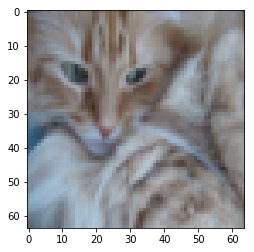

In [86]:
k = 2
plt.imshow(X0[k]), Y0[k]

In [128]:
m = X0.shape[0]   # Anzahl Daten 
X = X0.reshape(m, -1).T
n = X.shape[0]    # Anzahl Features

Y = Y0.reshape(1,-1)
X = X / 255

w = np.zeros((n,1))
b = 0
learning_rate = 0.005
num_iterations = 2000

w, b, cost = optimize(w,b,X,Y,num_iterations,learning_rate)
Y_predict = predict(w, b, X)
print("train accuracy: {:5.2f} %".format(100 - np.mean(np.abs(Y_predict - Y)) * 100))

train accuracy: 99.04 %


In [91]:
D1 = h5py.File('datasets/test_catvnoncat.h5', "r")
X1 = np.array(D1['test_set_x'][:]) 
Y1 = np.array(D1['test_set_y'][:]) 
m = X1.shape[0]         # Anzahl Daten
X = X1.reshape(m, -1).T
Y = Y1.reshape(1,-1)

X = X / 255
Y_predict = predict(w, b, X)
print("test accuracy: {:5.2f} %".format(100 - np.mean(np.abs(Y_predict - Y)) * 100))

test accuracy: 70.00 %


(<matplotlib.image.AxesImage at 0x1c81f355320>, 1, 0.0)

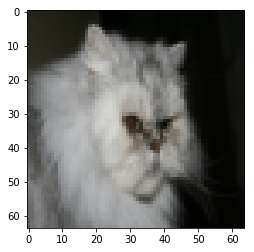

In [267]:
# Betrachte einzeln die ersten 15 Bilder
k = 10
plt.imshow(X1[k]), Y[0,k], Y_predict[0,k] 
 

#### Neuronales Netz mit einem Hidden Layer

In [273]:
D = np.load('data/train_data.npy')
X = D[:,:13].T
m = X.shape[1]      # Anzahl Daten
n = X.shape[0]      # Anzahl Features  
n1 = 4              # Anzahl Neuronen in Layer1 (hidden layer)
Y = D[:,13].reshape(1,-1)
learning_rate = 0.0001

# lr=0.0001, iter=500000 iter, n1=4, seed=41: 89 % 
 
# Die Gewichte werden mit kleinen Zufallszahlen und die Biasse mit 0 initialisiert
np.random.seed(41)
W1 = np.random.randn(n1,n)*0.01
b1 = np.zeros((n1,1))
W2 = np.random.randn(1,n1)*0.01
b2 = 0

for i in range(500000):
    # forward
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)

    # backward
    dZ2= A2-Y
    dW2 = np.dot(dZ2,A1.T)/m
    db2 = np.sum(dZ2,axis=1,keepdims=True)/m
    dZ1 = np.dot(W2.T,dZ2)*(1-np.power(A1,2))
    dW1 = np.dot(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1,keepdims=True)/m

    # update
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2

cost = np.multiply(np.log(A2),Y)+ np.multiply(np.log(1-A2),1-Y)
cost = -np.sum(cost)/m
cost = np.squeeze(cost) 
print(cost)

predictions = np.around(A2)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
 

0.3148851140813606
Accuracy: 88%
